In [2]:
import scipy.optimize as so
import math as m
import numpy as np
import matplotlib.pyplot as plt

In [3]:

def fitnessFunction(X):
    v = float(X)
    m = 1 + (np.cos(0.04*v))**2
    n = np.exp((- (v) **2 )/(20000))
    return m * n

In [4]:
X = []
for i in range(-500, 500, 1):
    X = X + [i]

In [5]:
Y = []
for i in X:
    Y = Y + [fitnessFunction(i)]

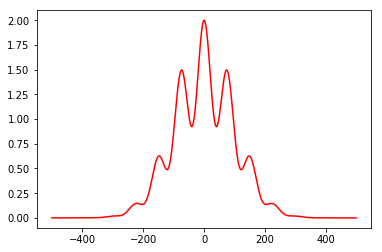

In [6]:
plt.plot(X, Y, color = 'red')
plt.show()

In [44]:
def f(X): return -fitnessFunction(X)
res = so.basinhopping(f, x0 = 250, T = 10, niter=1000, interval = 10, stepsize=0.5)
res

                        fun: -2.0
 lowest_optimization_result:       fun: -2.0
 hess_inv: array([[1374.07278829]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 27
      nit: 2
     njev: 9
   status: 0
  success: True
        x: array([-1.75764209e-08])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 17373
                        nit: 1000
                       njev: 5791
                          x: array([-1.75764209e-08])

In [50]:
res.fun

-2.0

In [46]:
resultX = []
initTemp = [1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000]
for t in initTemp:
    res = so.basinhopping(f, x0 = 250, T = t, niter=500, interval=10, stepsize=0.5)
    resultX = resultX + [res.x]
    if res.fun == -2:
        print("Temperature is {} for fun = {} and x = {}:".format(t, res.fun, res.x))

Temperature is 1 for fun = -2.0 and x = [-1.58136099e-07]:
Temperature is 10 for fun = -2.0 and x = [1.84646447e-07]:
Temperature is 1000 for fun = -2.0 and x = [-4.02620177e-08]:
Temperature is 10000 for fun = -2.0 and x = [2.40133776e-07]:
Temperature is 50000 for fun = -2.0 and x = [-1.04747157e-07]:


In [32]:
print(min(resultX))
print(res.fun)

[-3.93861967e-07]
-2.0


In [66]:
initTemp = [1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000]
for t in initTemp:
    count = 0
    for i in range(0, 20, 1):
        res2 = so.basinhopping(f, x0 = 250, T = t, niter=1000, interval=20, stepsize=0.5)
        if res2.fun == -2:
            count = count + 1
    print("For temperature {}, {}% of right answer in #iteration {}.".format(t, count * 5, res2.nit))

For temperature 1, 80% of right answer in #iteration 1000.
For temperature 5, 95% of right answer in #iteration 1000.


KeyboardInterrupt: 

In [ ]:
res2

In [81]:
def annealing(random_start,
              cost_function,
              random_neighbour,
              acceptance,
              temperature,
              maxsteps=1000,
              debug=True):
    """ Optimize the black-box function 'cost_function' with the simulated annealing algorithm."""
    state = random_start()
    cost = cost_function(state)
    states, costs = [state], [cost]
    for step in range(maxsteps):
        fraction = step / float(maxsteps)
        T = temperature(fraction)
        new_state = random_neighbour(state, fraction)
        new_cost = cost_function(new_state)
        if debug: print("Step #{:>2}/{:>2} : T = {:>4.3g}, state = {:>4.3g}, cost = {:>4.3g}, new_state = {:>4.3g}, new_cost = {:>4.3g} ...".format(step, maxsteps, T, state, cost, new_state, new_cost))
        if acceptance_probability(cost, new_cost, T) > rn.random():
            state, cost = new_state, new_cost
            states.append(state)
            costs.append(cost)
            # print("  ==> Accept it!")
        # else:
        #    print("  ==> Reject it...")
    return state, cost_function(state), states, costs

In [74]:
def cost_function(X): return -fitnessFunction(X)

In [82]:
annealing(random_start, cost_function, random_neighbour, acceptance_probability, temperature, maxsteps=30, debug=True)

NameError: name 'random_start' is not defined